### Adding polynomial features

This worksheet shows how adding polynomial features can improve performance.

We use this dataset:

https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


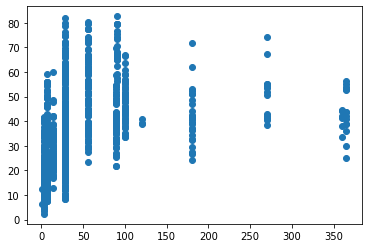

In [10]:
## Change the column numbers to see different pair plots.

plt.scatter(df[df.columns[7]],df[df.columns[-1]])
plt.show()

In [4]:
## Scale data and get train-test split

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.values[:,:-1]
y = df.values[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((772, 8), (258, 8))

In [5]:
## Transform the data to get polynomial features 

from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(2)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)
X_train_poly.shape

(772, 45)

In [6]:
from sklearn.metrics import r2_score
w = np.linalg.pinv(X_train_poly).dot(y_train)
yhat = X_test_poly.dot(w)

poly_score_train = r2_score(X_train_poly.dot(w),y_train)
poly_score_test = r2_score(yhat,y_test)
print("Performance of polynomial model:")
poly_score_train,poly_score_test

Performance of polynomial model:


(0.7749531696791336, 0.7128962236434888)

In [7]:
w = np.linalg.pinv(X_train).dot(y_train)
yhat = X_test.dot(w)

score_train = r2_score(X_train.dot(w),y_train)
score_test = r2_score(yhat,y_test)
print("Performance of linear (in X) model:")
score_train,score_test

Performance of linear (in X) model:


(0.39841649353305697, 0.42167820502816744)

In [9]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
print("Performance of random forest:")
regr.score(X_test,y_test)

Performance of random forest:


0.9100008845863149